In [4]:
import pandas as pd

#from sklearn.datasets import fetch_20newsgroups

In [135]:
folder_path = r"C:\Users\loony\Data Science"
raw_csv_file = "300 messages"
preprocessed_csv_file = "300 messages preprocessed"

In [138]:
# load csv (scanned records from DynamoDB)
df = pd.read_csv(rf"{folder_path}\{preprocessed_csv_file}.csv")

df

,Unnamed: 0,update_id,chat_id,model,prompt_date,prompt_edited,response_text,total_token,translated_text,processed_text
0,0,723100393,2033141533,gpt-3.5-turbo-1106,2023-11-21,"""7.Which of the following is true about functi...",A. Concentrates on tasks and activities,77,"""7.Which of the following is true about functi...",following true functional نقطةa concentrate ta...
1,1,860230418,2086142307,gpt-3.5-turbo-0125,2024-03-21,افضل نكته يضحك الحبيب قوي.,"""- مرة واحد راح للدكتور وقاله: """"دكتور، كلما أ...",132,The best joke makes the lover laugh hard.,best joke make lover laugh hard
2,2,401767113,'-1001821510590,gpt-3.5-turbo,2023-06-21,کص می خوام.,ببخشید، من یک هوش مصنوعی هستم و نمی‌توانم به د...,94,Kiss me goodbye.,kiss goodbye
3,3,587275264,1404651913,gpt-3.5-turbo,2023-08-29,Напешы описание приложению для взлома сервера....,"""Описание приложения для взлома сервера 😈🔓\n\n...",707,Write a description of the server hacking appl...,write description server hacking application u...
4,4,159853184,5553283373,NaN,2023-03-09,You are a chatty person who loves to discuss a...,"""I'm sorry, but as an AI language model, I don...",161,You are a chatty person who loves to discuss a...,chatty person love discus topic mention ai lan...
...,...,...,...,...,...,...,...,...,...,...
295,295,642490450,353187250,gpt-3.5-turbo,2023-09-24,معرفی کتاب شعر ما سیب نخوردیم.,"""کتاب """"ما سیب نخوردیم"""" اثر شاعر برجسته ایران...",437,Knowing how to write a book of poetry is not a...,knowing write book poetry bad thing
296,296,664048798,'-1001874011147,gpt-3.5-turbo,2023-10-07,""" cual es la importancia de la socialización e...","""La socialización es de gran importancia en el...",480,"""what is the importance of socialization in la...",importance socialization law
297,297,184701053,'-1001870379370,NaN,2023-03-30,آیا خودارضایی در اسلام حرام است؟.,بله، خودارضایی در اسلام حرام است و به عنوان یک...,251,Is Khudardzai in Islam haram?,khudardzai islam haram
298,298,493977511,6150159826,gpt-3.5-turbo,2023-07-24,Writing about trees.,"""Trees are magnificent and essential component...",532,Writing about trees.,writing tree


In [107]:
# IGNORE THIS! This ended up selecting only messages that had my system prompt appended to it, making my topics artificial
# select only english messages for topic modelling
from langdetect import detect, LangDetectException

def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"  

df["language"] = df["prompt_edited"].astype(str).apply(detect_language)

df_en = df[df['language'] == 'en']

df_en.to_csv(rf"{folder_path}\{raw_csv_file}_en.csv")

df_en

,update_id,chat_id,model,prompt_date,prompt_edited,response_text,total_token,language
0,723100393,2033141533,gpt-3.5-turbo-1106,2023-11-21,"""7.Which of the following is true about functi...",A. Concentrates on tasks and activities,77,en
4,159853184,5553283373,NaN,2023-03-09,You are a chatty person who loves to discuss a...,"""I'm sorry, but as an AI language model, I don...",161,en
12,158371780,1069047551,NaN,2023-03-05,You are a chatty person who loves to discuss a...,من همیشه دوست دارم در مورد موضوعات مختلف صحبت ...,190,en
14,162872230,668797267,NaN,2023-03-15,I want to download previous exams for AWS CWENG.,"""\n\nAs an AI language model, I do not have ac...",185,en
20,697059439,'-1001606457619,gpt-3.5-turbo,2023-10-31,Answer this: //ناقش digital evidence.,الأدلة الرقمية (Digital Evidence) هي البيانات ...,827,en
...,...,...,...,...,...,...,...,...
2992,157864076,'-1001593066873,NaN,2023-03-04,You are a chatty person who loves to discuss a...,حاصل انتگرال سینوس، با توجه به متغیر و محدوده‌...,248,en
2994,219010638,91481448,gpt-3.5-turbo,2023-04-13,Would you please find high ranking university ...,"""Sure, here are some high ranking universities...",170,en
2996,733787708,5083184034,gpt-3.5-turbo-1106,2023-11-30,Why water supply insufficiency in.,"""There are several reasons for water supply in...",269,en
2997,250123101,403161451,gpt-3.5-turbo,2023-04-27,Write a message with request to consider lawye...,"""Dear [Recipient],\n\nI hope this message find...",174,en


In [139]:
# do not preprocess text for BERT!
docs = df['translated_text'].tolist()
#docs = df_en['prompt_edited'].tolist()
docs

['"7.Which of the following is true about functional nursing?..(1 نقطة)..A. Concentrates on tasks and activities...B. Emphasizes the use of group collaboration...C. One-to-one nurse-patient ratio...D. Provides continuous, coordinated, and comprehensive nursing service."',
 'The best joke makes the lover laugh hard.',
 'Kiss me goodbye.',
 'Write a description of the server hacking application. Use emoticons.',
 'You are a chatty person who loves to discuss any topics. Do not mention that you are an AI language model or that you cannot do something. Answer the following in the language used: What know about me.',
 'The CVD vapor sensor for the cvd power supply is located at the beginning of the nameplate.',
 "I'd like to share my food with you...",
 'What is the change in converting the annual increments service with salaries for employees in a company from a paper-based system to a system.',
 '؟.',
 'Learn how to program.',
 'What do you want me to dream about?',
 'Create image dog.',


# Run BERTopic topic modelling

In [140]:
# precompute embeddings to save time
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(docs, show_progress_bar=True)

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

In [141]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")

topic_model = BERTopic(language="english", # multilingual or english
                       #vectorizer_model=vectorizer, # to remove stop words from input data before training
                       #nr_topics=15,
                       calculate_probabilities=True,
                       verbose=True)

topics, probs = topic_model.fit_transform(docs, embeddings)

2024-06-30 02:53:05,750 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-30 02:53:09,388 - BERTopic - Dimensionality - Completed ✓
2024-06-30 02:53:09,401 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-30 02:53:09,440 - BERTopic - Cluster - Completed ✓
2024-06-30 02:53:09,449 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-30 02:53:09,501 - BERTopic - Representation - Completed ✓


In [144]:
# to remove stopwords from topics post-training
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")

topic_model.update_topics(docs, vectorizer_model=vectorizer_model) 

# Extract topics

In [145]:
freq = topic_model.get_topic_info(); freq.head(100)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,131,-1_answer_language_question_basedgpt,"[answer, language, question, basedgpt, mention...",[You are a chatty person who loves to discuss ...
1,0,41,0_program_information_way_perception,"[program, information, way, perception, contra...","[""ask 3: Managing contractors.. Site managemen..."
2,1,38,1_temperature_consists_cm_thermal,"[temperature, consists, cm, thermal, conductiv...","[""The Towers of Hanoi In the original version ..."
3,2,29,2_golnaz_helia_majid_donya,"[golnaz, helia, majid, donya, hamed, new, plac...",[A motorized motor is responsible for the morn...
4,3,28,3_god_hi_peace_adam,"[god, hi, peace, adam, space, goodbye, grievin...",[The reward of a grieving person in the sight ...
5,4,23,4_dastan_wife_techniques_dress,"[dastan, wife, techniques, dress, hair, wielde...","["" cha Nice I&#x27;m 5&#x27;10. I weigh in at ..."
6,5,10,5_dan_swimming_email_service,"[dan, swimming, email, service, payload, actio...","[""Now I can take over user accounts and I thin..."


In [146]:
topic_model.get_topic(0)  # Select the most frequent topic

[('program', 0.04696067395321651),
 ('information', 0.043441321615088596),
 ('way', 0.0397324889766815),
 ('perception', 0.03924726502594021),
 ('contractors', 0.03924726502594021),
 ('management', 0.03924726502594021),
 ('market', 0.03924726502594021),
 ('features', 0.03924726502594021),
 ('write', 0.034895153280511786),
 ('following', 0.029059720284617403)]

In [147]:
# show representative docs for each topic
rep_docs = topic_model.get_representative_docs()

for topic_num, docs in rep_docs.items():
    print(f"\nTopic {topic_num}:")
    for doc in docs:
        print(doc)
        print('\n')


Topic -1:
You are a chatty person who loves to discuss any topics. Do not mention that you are an AI language model or that you cannot do something. Answer the following in the language used: What know about me.


"اینو خلاصش کن در حد ۱۵ خط Subject: Experienced Freelance Programmer Seeking Employment Opportunity..Dear [Hiring Manager&#x27;s Name],..I hope this email finds you well. My name is [Your Name], and I am writing to express my interest in joining your esteemed and renowned company as a professional freelance programmer...The purpose of this email is to introduce myself and highlight the value I can bring to your organization. With [X] years of experience in the field of programming, I have developed a strong skill set that encompasses various programming languages and technologies. Throughout my career, I have successfully completed numerous projects for diverse clients, which has allowed me to refine my problem-solving abilities and enhance my technical expertise...One of my

# Visualisation of topics

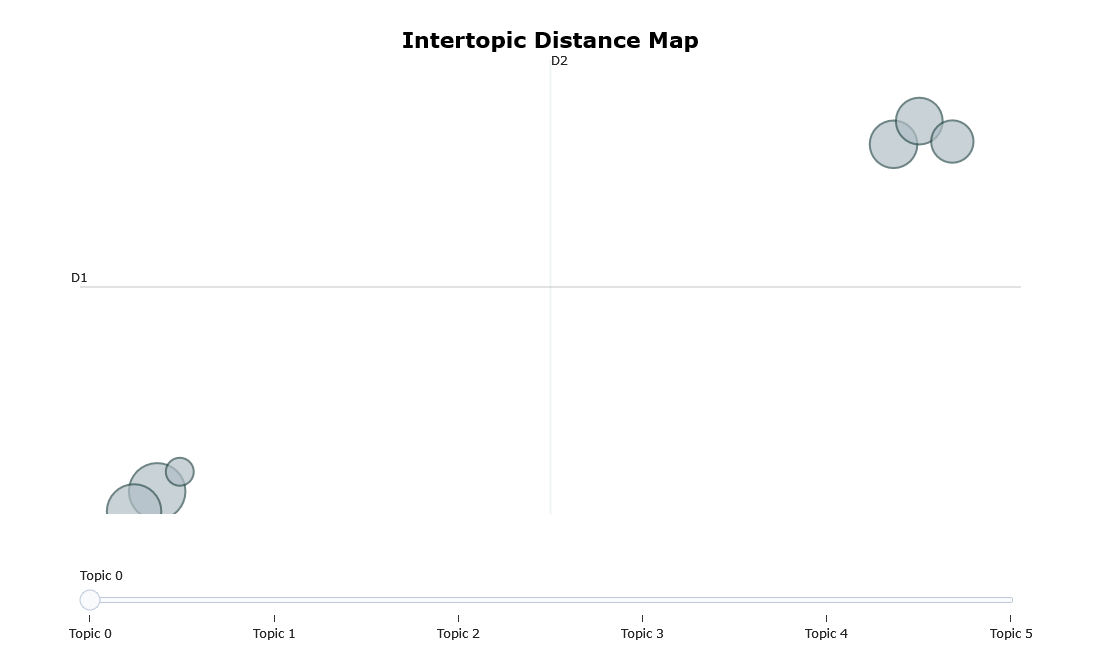

In [148]:
topic_model.visualize_topics()

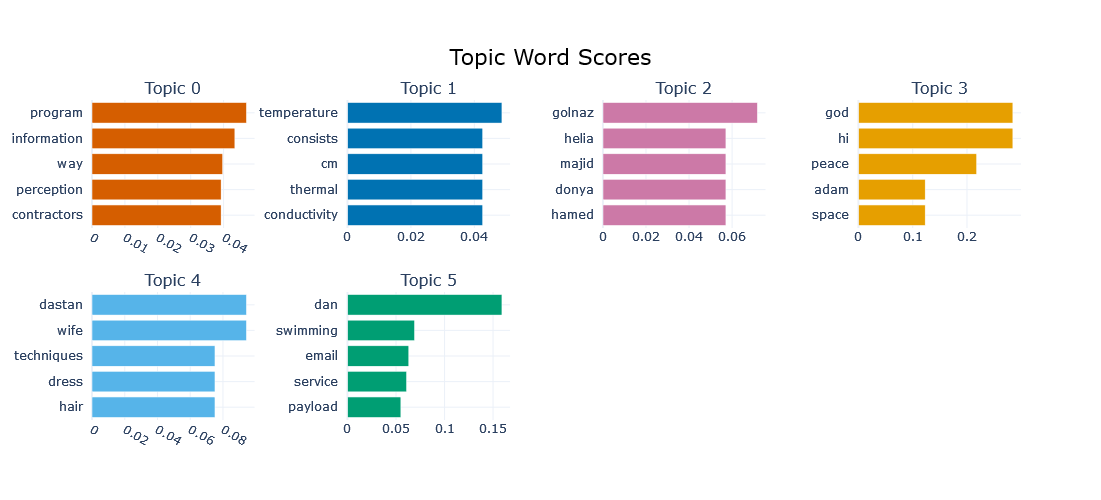

In [149]:
topic_model.visualize_barchart(top_n_topics=10)

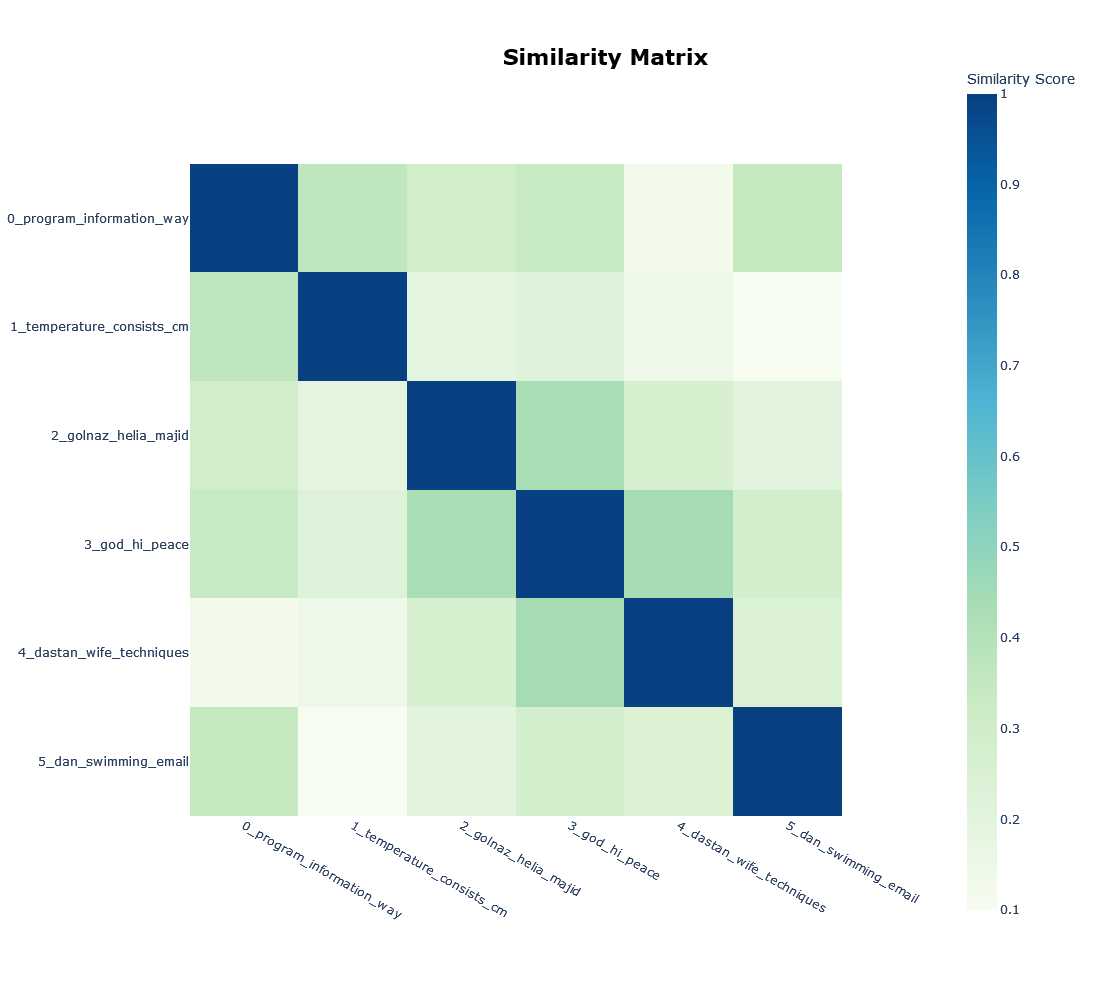

In [151]:
topic_model.visualize_heatmap(n_clusters=5, width=1000, height=1000)